<a href="https://colab.research.google.com/github/autivinay/autivinay/blob/main/CE605A_231030066_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-------------------------------------------------------------------------------
#   Programming Assignment 05: MONTE CARLO SIMULATION
#-------------------------------------------------------------------------------
#Name : Vinay Rajesh Auti                                     Roll_No: 231030066
#-------------------------------------------------------------------------------

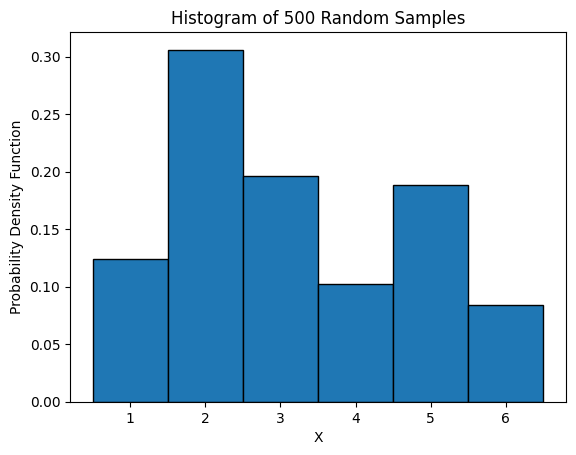

In [43]:
# Question 1 (a)
import numpy as np
import matplotlib.pyplot as plt

# Given pmf
X   = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

# Generate 500 random samples
uniform_samples = np.random.rand(500)
inverse_transform_samples = np.searchsorted(cdf, uniform_samples) + 1  # Add 1 to convert index to actual values

# Plot histogram
plt.hist(inverse_transform_samples, bins=np.arange(0.5, 7.5, 1), edgecolor='black', align='mid', density=True)
plt.title('Histogram of 500 Random Samples')
plt.xlabel('X')
plt.ylabel('Probability Density Function')
plt.show()

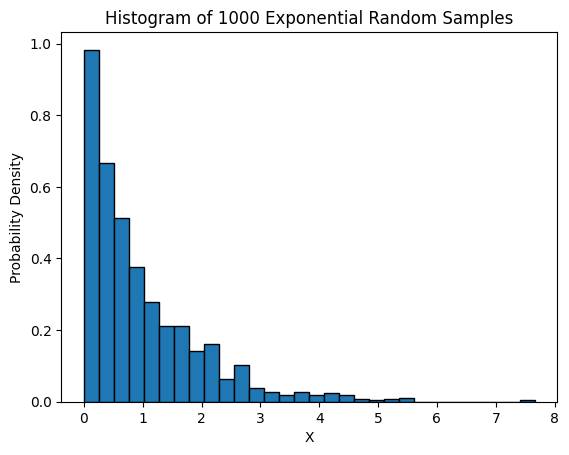

In [42]:
# Question 1 (b)
import numpy as np
import matplotlib.pyplot as plt

def exponential_pdf(x, lambd=1):
    """Exponential distribution probability density function."""
    return lambd * np.exp(-lambd * x)

def inverse_exponential_cdf(u, lambd=1):
    """Inverse CDF (quantile function) for the exponential distribution."""
    return -np.log(1 - u) / lambd

# Generate 1000 random samples using inverse CDF method
uniform_samples = np.random.rand(1000)
exponential_samples = inverse_exponential_cdf(uniform_samples)

# Plot histogram
plt.hist(exponential_samples, bins=30, edgecolor='black', density=True)
plt.title('Histogram of 1000 Exponential Random Samples')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show()

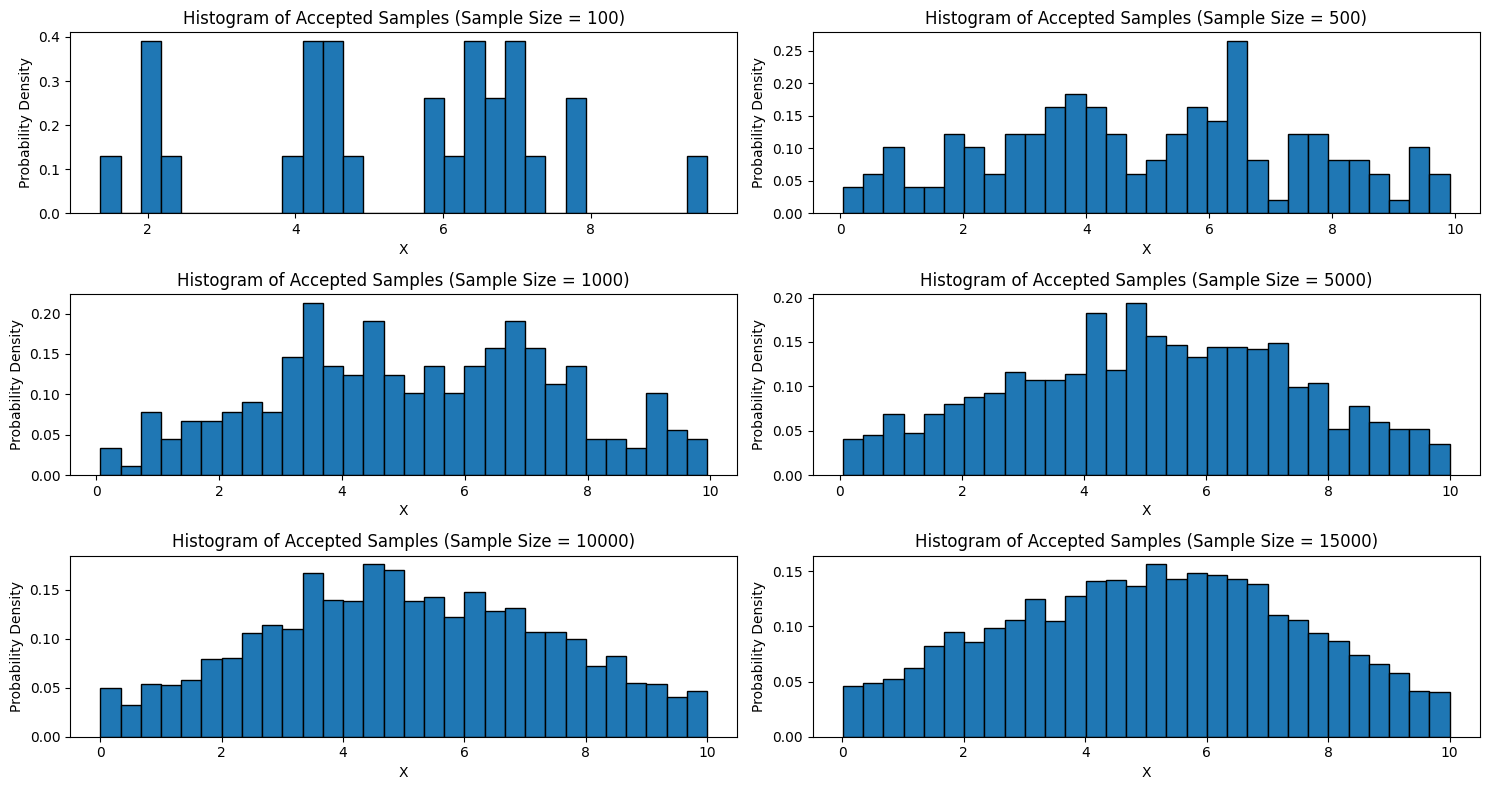

In [81]:
# Question 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_uniform_samples(sample_size, lower_bound, upper_bound):
    """Generate random samples from a uniform distribution."""
    return np.random.uniform(lower_bound, upper_bound, sample_size)

def accept_reject(samples):
    """Accept or reject samples based on the standard normal distribution."""
    z_scores = (samples - 5) / (5 / np.sqrt(3))  # Convert uniform samples to standard normal z-scores
    acceptance_prob = norm.pdf(z_scores)  # Probability of acceptance based on the standard normal distribution
    accept_mask = np.random.rand(len(samples)) < acceptance_prob  # Accept if random value < acceptance probability
    accepted_samples = samples[accept_mask]
    return accepted_samples

# Set parameters
sample_sizes = [100, 500, 1000, 5000, 10000, 15000]
lower_bound_uniform = 0
upper_bound_uniform = 10

# Plot histograms for different sample sizes
plt.figure(figsize=(15, 8))

for i, sample_size in enumerate(sample_sizes):
    # Generate uniform samples
    uniform_samples = generate_uniform_samples(sample_size, lower_bound_uniform, upper_bound_uniform)

    # Accept or reject samples based on the standard normal distribution
    accepted_samples = accept_reject(uniform_samples)

    # Plot histograms
    plt.subplot(3, 2, i+1)
    plt.hist(accepted_samples, bins=30, edgecolor='black', density=True)
    plt.title(f'Histogram of Accepted Samples (Sample Size = {sample_size})')
    plt.xlabel('X')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

In [94]:
# BONUS
import numpy as np

# Define the parameters
sensitivity = 0.95
specificity = 0.90
prevalence = 0.01

# Number of simulations
num_simulations = 1000

# Simulate the test results and calculate the probability using inverse CDF method
positive_given_disease = np.random.choice([1, 0], size=num_simulations, p=[sensitivity, 1 - sensitivity])
negative_given_no_disease = np.random.choice([1, 0], size=num_simulations, p=[1 - specificity, specificity])
samples = np.random.choice([1, 0], size=num_simulations, p=[prevalence, 1 - prevalence])

# Extract samples where the test result is positive and calculate the probability
disease_samples = samples[positive_given_disease == 1]
probability_estimation = np.sum(disease_samples) / len(disease_samples) if len(disease_samples) > 0 else 0

print("Estimated probability that the person has the disease given a positive test result:", probability_estimation)

Estimated probability that the person has the disease given a positive test result: 0.004214963119072708
